<a href="https://colab.research.google.com/github/setyo-dwi-pratama/FGA-DTS-KOMINFO-Challenge/blob/main/TorontoBikeshareData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Toronto Bikeshare Data**

**Deskripsi**

The Bike Share Toronto Ridership data contains anonymized trip data, including:

Trip start day and time, Trip end day and time, Trip duration, Trip start station, Trip end station, User type

# **Packages**

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import requests
import urllib3
from urllib3 import request
import certifi
import datetime
from pandas.io.json import json_normalize
import networkx as nx

# **Dataset**

*https://www.kaggle.com/jackywang529/toronto-bikeshare-data?*

In [157]:
from zipfile import ZipFile
file_name = "archive.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Sukses')

Sukses


In [158]:
# Akses Data 2017
q1_2017 = pd.read_csv('bikeshare-ridership-2017/2017 Data/Bikeshare Ridership (2017 Q1).csv')
q2_2017 = pd.read_csv('bikeshare-ridership-2017/2017 Data/Bikeshare Ridership (2017 Q2).csv')
q3_2017 = pd.read_csv('bikeshare-ridership-2017/2017 Data/Bikeshare Ridership (2017 Q3).csv')
q4_2017 = pd.read_csv('bikeshare-ridership-2017/2017 Data/Bikeshare Ridership (2017 Q4).csv')
q1_2017['trip_start_time'] = pd.to_datetime(q1_2017['trip_start_time'])
q2_2017['trip_start_time'] = pd.to_datetime(q1_2017['trip_start_time'])
q3_2017['trip_start_time'] = pd.to_datetime(q1_2017['trip_start_time'])
q4_2017['trip_start_time'] = pd.to_datetime(q1_2017['trip_start_time'])
q1_2017['trip_stop_time'] = pd.to_datetime(q1_2017['trip_stop_time'])
q2_2017['trip_stop_time'] = pd.to_datetime(q1_2017['trip_stop_time'])
q3_2017['trip_stop_time'] = pd.to_datetime(q1_2017['trip_stop_time'])
q4_2017['trip_stop_time'] = pd.to_datetime(q1_2017['trip_stop_time'])

In [159]:
# Akses Data 2018
q1_2018 = pd.read_csv('bikeshare2018/bikeshare2018/Bike Share Toronto Ridership_Q1 2018.csv')
q2_2018 = pd.read_csv('bikeshare2018/bikeshare2018/Bike Share Toronto Ridership_Q2 2018.csv')
q3_2018 = pd.read_csv('bikeshare2018/bikeshare2018/Bike Share Toronto Ridership_Q3 2018.csv')
q4_2018 = pd.read_csv('bikeshare2018/bikeshare2018/Bike Share Toronto Ridership_Q4 2018.csv')
q1_2018['trip_start_time'] = pd.to_datetime(q1_2018['trip_start_time'])
q2_2018['trip_start_time'] = pd.to_datetime(q1_2018['trip_start_time'])
q3_2018['trip_start_time'] = pd.to_datetime(q1_2018['trip_start_time'])
q4_2018['trip_start_time'] = pd.to_datetime(q1_2018['trip_start_time'])
q1_2018['trip_stop_time'] = pd.to_datetime(q1_2018['trip_stop_time'])
q2_2018['trip_stop_time'] = pd.to_datetime(q1_2018['trip_stop_time'])
q3_2018['trip_stop_time'] = pd.to_datetime(q1_2018['trip_stop_time'])
q4_2018['trip_stop_time'] = pd.to_datetime(q1_2018['trip_stop_time'])

In [160]:
# Menggabungkan dataset 2017
toronto2017 = [q1_2017, q2_2017, q3_2017, q4_2017]
bike2017 = pd.concat(toronto2017)
bike2017.head()

,trip_id,trip_start_time,trip_stop_time,trip_duration_seconds,from_station_id,from_station_name,to_station_id,to_station_name,user_type
0,712382,2017-01-01 00:00:00,2017-01-01 00:03:00,223,7051.0,Wellesley St E / Yonge St Green P,7089.0,Church St / Wood St,Member
1,712383,2017-01-01 00:00:00,2017-01-01 00:05:00,279,7143.0,Kendal Ave / Bernard Ave,7154.0,Bathurst Subway Station,Member
2,712384,2017-01-01 00:05:00,2017-01-01 00:29:00,1394,7113.0,Parliament St / Aberdeen Ave,7199.0,College St W / Markham St,Member
3,712385,2017-01-01 00:07:00,2017-01-01 00:21:00,826,7077.0,College Park South,7010.0,King St W / Spadina Ave,Member
4,712386,2017-01-01 00:08:00,2017-01-01 00:12:00,279,7079.0,McGill St / Church St,7047.0,University Ave / Gerrard St W,Member


In [161]:
bike2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1492369 entries, 0 to 363404
Data columns (total 9 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trip_id                1492369 non-null  int64         
 1   trip_start_time        528492 non-null   datetime64[ns]
 2   trip_stop_time         528492 non-null   datetime64[ns]
 3   trip_duration_seconds  1492369 non-null  int64         
 4   from_station_id        465476 non-null   float64       
 5   from_station_name      1492369 non-null  object        
 6   to_station_id          465476 non-null   float64       
 7   to_station_name        1492368 non-null  object        
 8   user_type              1492369 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(2), object(3)
memory usage: 113.9+ MB


In [162]:
# Menggabungkan dataset 2018
toronto2018 = [q1_2018, q2_2018, q3_2018, q4_2018]
bike2018 = pd.concat(toronto2018)
bike2018.head()

,trip_id,trip_duration_seconds,from_station_id,trip_start_time,from_station_name,trip_stop_time,to_station_id,to_station_name,user_type
0,2383648,393,7018,2018-01-01 00:47:00,Bremner Blvd / Rees St,2018-01-01 00:54:00,7176,Bathurst St / Fort York Blvd,Annual Member
1,2383649,625,7184,2018-01-01 00:52:00,Ossington Ave / College St,2018-01-01 01:03:00,7191,Central Tech (Harbord St),Annual Member
2,2383650,233,7235,2018-01-01 00:55:00,Bay St / College St (West Side) - SMART,2018-01-01 00:59:00,7021,Bay St / Albert St,Annual Member
3,2383651,1138,7202,2018-01-01 00:57:00,Queen St W / York St (City Hall),2018-01-01 01:16:00,7020,Phoebe St / Spadina Ave,Annual Member
4,2383652,703,7004,2018-01-01 01:00:00,University Ave / Elm St,2018-01-01 01:12:00,7060,Princess St / Adelaide St E,Annual Member


In [163]:
bike2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1922955 entries, 0 to 363489
Data columns (total 9 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trip_id                int64         
 1   trip_duration_seconds  int64         
 2   from_station_id        int64         
 3   trip_start_time        datetime64[ns]
 4   from_station_name      object        
 5   trip_stop_time         datetime64[ns]
 6   to_station_id          int64         
 7   to_station_name        object        
 8   user_type              object        
dtypes: datetime64[ns](2), int64(4), object(3)
memory usage: 146.7+ MB


# EDA Dataset 2017

In [164]:
bike2017.isnull().sum()

trip_id                        0
trip_start_time           963877
trip_stop_time            963877
trip_duration_seconds          0
from_station_id          1026893
from_station_name              0
to_station_id            1026893
to_station_name                1
user_type                      0
dtype: int64

## Membuat kolom baru berdasarkan Jam, Hari dan Bulan

In [165]:
bike2017['hour_start'] = bike2017['trip_start_time'].apply(lambda time: time.hour)

In [166]:
bike2017['month_start'] = bike2017['trip_start_time'].apply(lambda time: time.month)

In [167]:
bike2017['weekday_start'] = bike2017['trip_start_time'].apply(lambda time: time.dayofweek)

In [168]:
bike2017['hour_stop'] = bike2017['trip_stop_time'].apply(lambda time: time.hour)

In [169]:
bike2017['month_stop'] = bike2017['trip_stop_time'].apply(lambda time: time.month)

In [170]:
bike2017['weekday_stop'] = bike2017['trip_stop_time'].apply(lambda time: time.dayofweek)

In [171]:
bike2017

,trip_id,trip_start_time,trip_stop_time,trip_duration_seconds,from_station_id,from_station_name,to_station_id,to_station_name,user_type,hour_start,month_start,weekday_start,hour_stop,month_stop,weekday_stop
0,712382,2017-01-01 00:00:00,2017-01-01 00:03:00,223,7051.0,Wellesley St E / Yonge St Green P,7089.0,Church St / Wood St,Member,0.0,1.0,6.0,0.0,1.0,6.0
1,712383,2017-01-01 00:00:00,2017-01-01 00:05:00,279,7143.0,Kendal Ave / Bernard Ave,7154.0,Bathurst Subway Station,Member,0.0,1.0,6.0,0.0,1.0,6.0
2,712384,2017-01-01 00:05:00,2017-01-01 00:29:00,1394,7113.0,Parliament St / Aberdeen Ave,7199.0,College St W / Markham St,Member,0.0,1.0,6.0,0.0,1.0,6.0
3,712385,2017-01-01 00:07:00,2017-01-01 00:21:00,826,7077.0,College Park South,7010.0,King St W / Spadina Ave,Member,0.0,1.0,6.0,0.0,1.0,6.0
4,712386,2017-01-01 00:08:00,2017-01-01 00:12:00,279,7079.0,McGill St / Church St,7047.0,University Ave / Gerrard St W,Member,0.0,1.0,6.0,0.0,1.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363400,2383642,NaT,NaT,26,NaN,Bloor St / Brunswick Ave,NaN,Bloor St / Brunswick Ave,Casual,NaN,NaN,NaN,NaN,NaN,NaN
363401,2383643,NaT,NaT,1467,NaN,Bloor St / Brunswick Ave,NaN,HTO Park (Queens Quay W),Casual,NaN,NaN,NaN,NaN,NaN,NaN
363402,2383644,NaT,NaT,609,NaN,Kendal Ave / Spadina Rd,NaN,Augusta Ave / Denison Sq,Member,NaN,NaN,NaN,NaN,NaN,NaN
363403,2383645,NaT,NaT,26,NaN,Phoebe St / Spadina Ave,NaN,Phoebe St / Spadina Ave,Member,NaN,NaN,NaN,NaN,NaN,NaN


In [172]:
bike2017.isnull().sum()

trip_id                        0
trip_start_time           963877
trip_stop_time            963877
trip_duration_seconds          0
from_station_id          1026893
from_station_name              0
to_station_id            1026893
to_station_name                1
user_type                      0
hour_start                963877
month_start               963877
weekday_start             963877
hour_stop                 963877
month_stop                963877
weekday_stop              963877
dtype: int64

In [175]:
bike2017 = bike2017.dropna()

In [176]:
bike2017.isnull().sum()

trip_id                  0
trip_start_time          0
trip_stop_time           0
trip_duration_seconds    0
from_station_id          0
from_station_name        0
to_station_id            0
to_station_name          0
user_type                0
hour_start               0
month_start              0
weekday_start            0
hour_stop                0
month_stop               0
weekday_stop             0
dtype: int64

In [177]:
bike2017

,trip_id,trip_start_time,trip_stop_time,trip_duration_seconds,from_station_id,from_station_name,to_station_id,to_station_name,user_type,hour_start,month_start,weekday_start,hour_stop,month_stop,weekday_stop
0,712382,2017-01-01 00:00:00,2017-01-01 00:03:00,223,7051.0,Wellesley St E / Yonge St Green P,7089.0,Church St / Wood St,Member,0.0,1.0,6.0,0.0,1.0,6.0
1,712383,2017-01-01 00:00:00,2017-01-01 00:05:00,279,7143.0,Kendal Ave / Bernard Ave,7154.0,Bathurst Subway Station,Member,0.0,1.0,6.0,0.0,1.0,6.0
2,712384,2017-01-01 00:05:00,2017-01-01 00:29:00,1394,7113.0,Parliament St / Aberdeen Ave,7199.0,College St W / Markham St,Member,0.0,1.0,6.0,0.0,1.0,6.0
3,712385,2017-01-01 00:07:00,2017-01-01 00:21:00,826,7077.0,College Park South,7010.0,King St W / Spadina Ave,Member,0.0,1.0,6.0,0.0,1.0,6.0
4,712386,2017-01-01 00:08:00,2017-01-01 00:12:00,279,7079.0,McGill St / Church St,7047.0,University Ave / Gerrard St W,Member,0.0,1.0,6.0,0.0,1.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132118,1020813,2017-03-31 23:49:00,2017-01-04 00:09:00,260,7158.0,King St W / Stafford St,7177.0,East Liberty St / Pirandello St,Member,23.0,3.0,4.0,0.0,1.0,2.0
132119,1020814,2017-03-31 23:49:00,2017-03-31 23:57:00,359,7072.0,Queen St W / Shaw St,7211.0,Fort York Blvd / Garrison Rd,Member,23.0,3.0,4.0,23.0,3.0,4.0
132120,1020815,2017-03-31 23:49:00,2017-03-31 23:57:00,477,7050.0,Richmond St E / Jarvis St Green P,7006.0,Bay St / College St (East Side),Member,23.0,3.0,4.0,23.0,3.0,4.0
132121,1020818,2017-03-31 23:52:00,2017-01-04 00:10:00,256,7031.0,Jarvis St / Isabella St,7055.0,Jarvis St / Carlton St,Member,23.0,3.0,4.0,0.0,1.0,2.0


In [178]:
mon = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
bike2017['month_start'] = bike2017['month_start'].map(mon)
bike2017['month_stop'] = bike2017['month_stop'].map(mon)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [179]:
day = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
bike2017['weekday_start'] = bike2017['weekday_start'].map(day)
bike2017['weekday_stop'] = bike2017['weekday_stop'].map(day)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [180]:
bike2017

,trip_id,trip_start_time,trip_stop_time,trip_duration_seconds,from_station_id,from_station_name,to_station_id,to_station_name,user_type,hour_start,month_start,weekday_start,hour_stop,month_stop,weekday_stop
0,712382,2017-01-01 00:00:00,2017-01-01 00:03:00,223,7051.0,Wellesley St E / Yonge St Green P,7089.0,Church St / Wood St,Member,0.0,Jan,Sun,0.0,Jan,Sun
1,712383,2017-01-01 00:00:00,2017-01-01 00:05:00,279,7143.0,Kendal Ave / Bernard Ave,7154.0,Bathurst Subway Station,Member,0.0,Jan,Sun,0.0,Jan,Sun
2,712384,2017-01-01 00:05:00,2017-01-01 00:29:00,1394,7113.0,Parliament St / Aberdeen Ave,7199.0,College St W / Markham St,Member,0.0,Jan,Sun,0.0,Jan,Sun
3,712385,2017-01-01 00:07:00,2017-01-01 00:21:00,826,7077.0,College Park South,7010.0,King St W / Spadina Ave,Member,0.0,Jan,Sun,0.0,Jan,Sun
4,712386,2017-01-01 00:08:00,2017-01-01 00:12:00,279,7079.0,McGill St / Church St,7047.0,University Ave / Gerrard St W,Member,0.0,Jan,Sun,0.0,Jan,Sun
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132118,1020813,2017-03-31 23:49:00,2017-01-04 00:09:00,260,7158.0,King St W / Stafford St,7177.0,East Liberty St / Pirandello St,Member,23.0,Mar,Fri,0.0,Jan,Wed
132119,1020814,2017-03-31 23:49:00,2017-03-31 23:57:00,359,7072.0,Queen St W / Shaw St,7211.0,Fort York Blvd / Garrison Rd,Member,23.0,Mar,Fri,23.0,Mar,Fri
132120,1020815,2017-03-31 23:49:00,2017-03-31 23:57:00,477,7050.0,Richmond St E / Jarvis St Green P,7006.0,Bay St / College St (East Side),Member,23.0,Mar,Fri,23.0,Mar,Fri
132121,1020818,2017-03-31 23:52:00,2017-01-04 00:10:00,256,7031.0,Jarvis St / Isabella St,7055.0,Jarvis St / Carlton St,Member,23.0,Mar,Fri,0.0,Jan,Wed


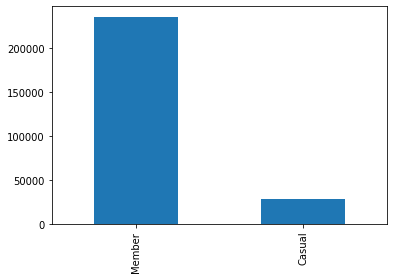

In [182]:
bike2017['user_type'].value_counts().plot(kind='bar')

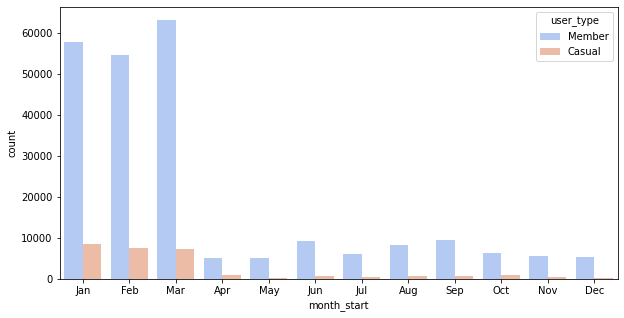

In [190]:
plt.figure(figsize=(10,5))
bulan = sns.countplot(data=bike2017, x='month_start', hue='user_type', palette='coolwarm')

Jumlah Pesepeda meningkat pada bulan Januari-Maret

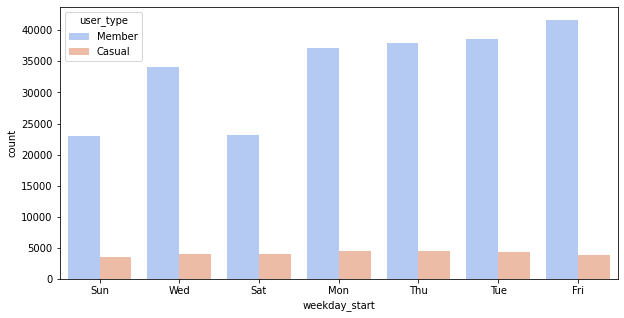

In [191]:
plt.figure(figsize=(10,5))
hari = sns.countplot(data=bike2017, x='weekday_start', hue='user_type', palette='coolwarm')

sepanjang tahun 2017, hari jumat merupakan jumlah tertinggi berdasarkan member

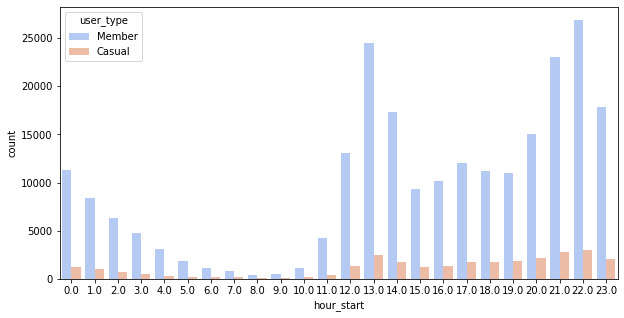

In [192]:
plt.figure(figsize=(10,5))
waktu = sns.countplot(data=bike2017, x='hour_start', hue='user_type', palette='coolwarm')

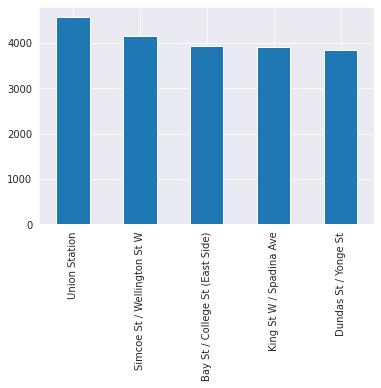

In [199]:
bike2017['from_station_name'].value_counts().head().plot(kind="bar")

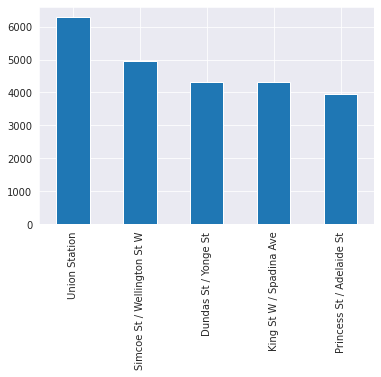

In [200]:
bike2017['to_station_name'].value_counts().head().plot(kind="bar")

In [203]:
aktivitas_harian = bike2017.groupby(by=['weekday_start','hour_start']).count()['user_type'].unstack()
aktivitas_harian

hour_start,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
weekday_start,,,,,,,,,,,,,,,,,,,,,,,,
Fri,2362,1726,1264,912,574,340,154,106,42,82,168,704,2310,5136,3576,1806,1988,2292,1960,1950,2760,4428,5526,3368
Mon,1492,1206,818,686,452,256,116,90,38,96,200,846,2582,4556,3278,1674,1740,2154,1882,1854,2832,4242,5146,3450
Sat,1646,1100,942,716,566,378,212,172,102,44,88,172,762,1736,1674,1108,1458,1714,1732,1796,2082,2378,2612,2014
Sun,1502,1138,842,794,508,338,316,308,116,84,76,220,686,1598,1562,1246,1410,1762,1894,1934,1994,2292,2248,1664
Thu,1882,1580,1236,848,518,244,144,106,48,86,240,956,2778,4678,3044,1660,1674,1916,1896,1856,2652,4320,4946,3166
Tue,2140,1596,1138,754,506,288,168,128,72,102,280,936,2880,5010,3102,1692,1748,2140,1872,1778,2544,4224,4624,3106
Wed,1508,1080,882,584,350,224,118,74,56,90,248,850,2460,4210,2922,1382,1452,1830,1698,1716,2436,3884,4738,3196


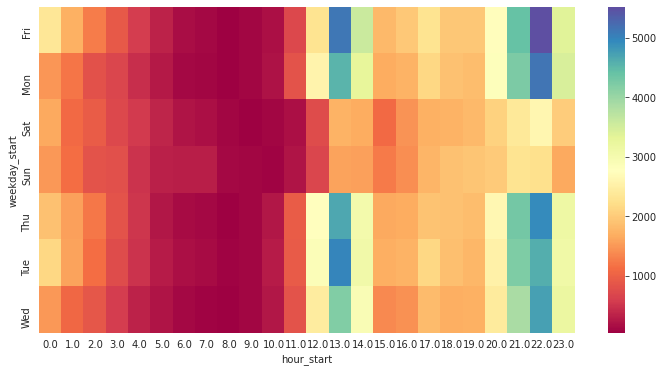

In [205]:
plt.figure(figsize=(12,6))
sns.heatmap(aktivitas_harian, cmap='Spectral')

# EDA Dataset 2018

In [206]:
bike2018.isnull().sum()

trip_id                        0
trip_duration_seconds          0
from_station_id                0
trip_start_time          1208719
from_station_name              0
trip_stop_time           1208719
to_station_id                  0
to_station_name                0
user_type                      0
dtype: int64

In [207]:
bike2018['hour_start'] = bike2018['trip_start_time'].apply(lambda time: time.hour)

In [208]:
bike2018['month_start'] = bike2018['trip_start_time'].apply(lambda time: time.month)

In [209]:
bike2018['weekday_start'] = bike2018['trip_start_time'].apply(lambda time: time.dayofweek)

In [210]:
bike2018['hour_stop'] = bike2018['trip_stop_time'].apply(lambda time: time.hour)

In [211]:
bike2018['month_stop'] = bike2018['trip_stop_time'].apply(lambda time: time.month)

In [212]:
bike2018['weekday_stop'] = bike2018['trip_stop_time'].apply(lambda time: time.dayofweek)

In [213]:
bike2018

,trip_id,trip_duration_seconds,from_station_id,trip_start_time,from_station_name,trip_stop_time,to_station_id,to_station_name,user_type,hour_start,month_start,weekday_start,hour_stop,month_stop,weekday_stop
0,2383648,393,7018,2018-01-01 00:47:00,Bremner Blvd / Rees St,2018-01-01 00:54:00,7176,Bathurst St / Fort York Blvd,Annual Member,0.0,1.0,0.0,0.0,1.0,0.0
1,2383649,625,7184,2018-01-01 00:52:00,Ossington Ave / College St,2018-01-01 01:03:00,7191,Central Tech (Harbord St),Annual Member,0.0,1.0,0.0,1.0,1.0,0.0
2,2383650,233,7235,2018-01-01 00:55:00,Bay St / College St (West Side) - SMART,2018-01-01 00:59:00,7021,Bay St / Albert St,Annual Member,0.0,1.0,0.0,0.0,1.0,0.0
3,2383651,1138,7202,2018-01-01 00:57:00,Queen St W / York St (City Hall),2018-01-01 01:16:00,7020,Phoebe St / Spadina Ave,Annual Member,0.0,1.0,0.0,1.0,1.0,0.0
4,2383652,703,7004,2018-01-01 01:00:00,University Ave / Elm St,2018-01-01 01:12:00,7060,Princess St / Adelaide St E,Annual Member,1.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363485,4581273,379,7088,NaT,Danforth Ave / Coxwell Ave,NaT,7091,Donlands Station,Annual Member,NaN,NaN,NaN,NaN,NaN,NaN
363486,4581274,306,7030,NaT,Bay St / Wellesley St W,NaT,7031,Jarvis St / Isabella St,Annual Member,NaN,NaN,NaN,NaN,NaN,NaN
363487,4581275,340,7020,NaT,Phoebe St / Spadina Ave,NaT,7000,Fort York Blvd / Capreol Ct,Annual Member,NaN,NaN,NaN,NaN,NaN,NaN
363488,4581276,1466,7014,NaT,Sherbourne St / Carlton St (Allan Gardens),NaT,7269,Toronto Eaton Centre (Yonge St),Annual Member,NaN,NaN,NaN,NaN,NaN,NaN


In [214]:
bike2018 = bike2018.dropna()

In [215]:
bike2018.isnull().sum()

trip_id                  0
trip_duration_seconds    0
from_station_id          0
trip_start_time          0
from_station_name        0
trip_stop_time           0
to_station_id            0
to_station_name          0
user_type                0
hour_start               0
month_start              0
weekday_start            0
hour_stop                0
month_stop               0
weekday_stop             0
dtype: int64

In [217]:
bike2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714236 entries, 0 to 178558
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trip_id                714236 non-null  int64         
 1   trip_duration_seconds  714236 non-null  int64         
 2   from_station_id        714236 non-null  int64         
 3   trip_start_time        714236 non-null  datetime64[ns]
 4   from_station_name      714236 non-null  object        
 5   trip_stop_time         714236 non-null  datetime64[ns]
 6   to_station_id          714236 non-null  int64         
 7   to_station_name        714236 non-null  object        
 8   user_type              714236 non-null  object        
 9   hour_start             714236 non-null  float64       
 10  month_start            714236 non-null  float64       
 11  weekday_start          714236 non-null  float64       
 12  hour_stop              714236 non-null  floa

In [218]:
mon = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
bike2018['month_start'] = bike2018['month_start'].map(mon)
bike2018['month_stop'] = bike2018['month_stop'].map(mon)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [220]:
day = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
bike2018['weekday_start'] = bike2018['weekday_start'].map(day)
bike2018['weekday_stop'] = bike2018['weekday_stop'].map(day)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


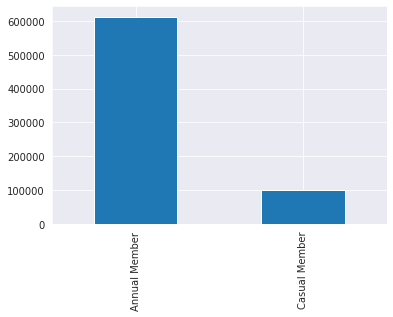

In [221]:
bike2018['user_type'].value_counts().plot(kind='bar')

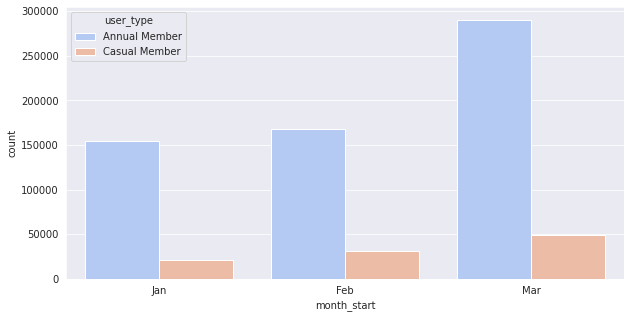

In [222]:
plt.figure(figsize=(10,5))
bulan1 = sns.countplot(data=bike2018, x='month_start', hue='user_type', palette='coolwarm')

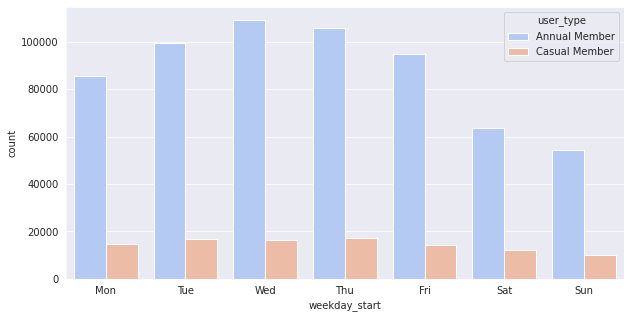

In [223]:
plt.figure(figsize=(10,5))
hari1 = sns.countplot(data=bike2018, x='weekday_start', hue='user_type', palette='coolwarm')

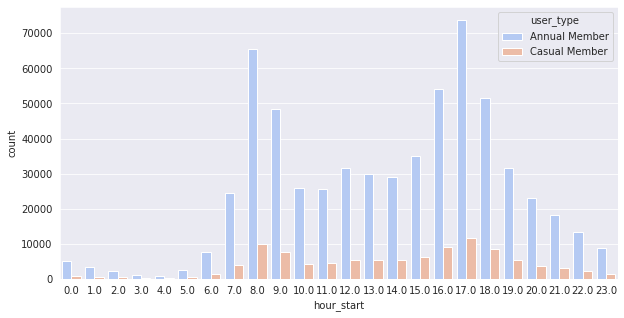

In [224]:
plt.figure(figsize=(10,5))
waktu1 = sns.countplot(data=bike2018, x='hour_start', hue='user_type', palette='coolwarm')

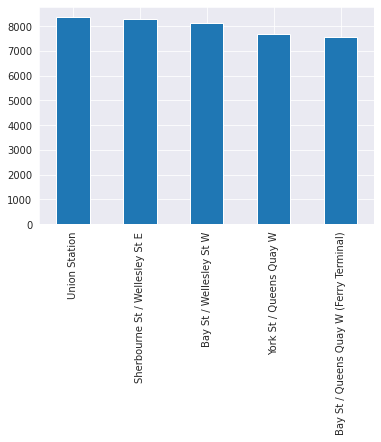

In [225]:
bike2018['from_station_name'].value_counts().head().plot(kind="bar")

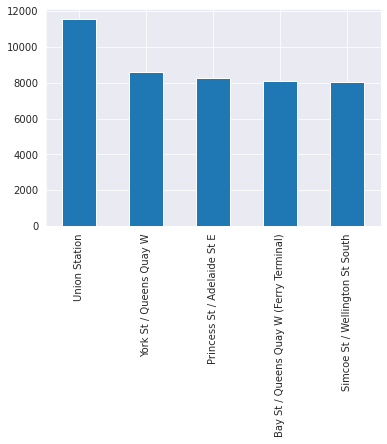

In [226]:
bike2018['to_station_name'].value_counts().head().plot(kind="bar")

In [227]:
aktivitas_harian1 = bike2018.groupby(by=['weekday_start','hour_start']).count()['user_type'].unstack()
aktivitas_harian1

hour_start,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
weekday_start,,,,,,,,,,,,,,,,,,,,,,,,
Fri,852,468,328,188,176,524,1508,4636,12848,9464,4772,4768,5524,4824,4800,6492,9492,12676,8832,5512,3512,2892,2360,1680
Mon,616,356,252,168,180,588,1516,4652,13124,8676,3588,3520,4300,4024,3924,4844,8808,13280,9072,5200,3812,2632,1900,1180
Sat,1336,1104,784,392,152,196,436,900,2028,3600,4748,5240,6340,6496,6384,6516,6604,5416,4820,3628,2716,2336,1924,1492
Sun,1136,1024,604,380,172,128,256,532,1116,2096,3368,4012,4880,5624,6100,6460,6500,5596,4496,3204,2312,1832,1528,1084
Thu,868,424,316,80,104,560,1896,6300,16476,11736,5080,4752,5520,4992,4312,5808,10340,15200,9964,6068,4844,3388,2428,1616
Tue,512,256,200,76,60,528,1628,5420,14504,10160,4096,3528,5056,4488,4096,5348,10040,15700,10836,6700,4784,4172,2664,1520
Wed,784,400,324,108,108,564,1824,5784,15432,10244,4544,4232,5152,4872,4552,5616,11220,17592,12096,6724,4892,4088,2780,1492


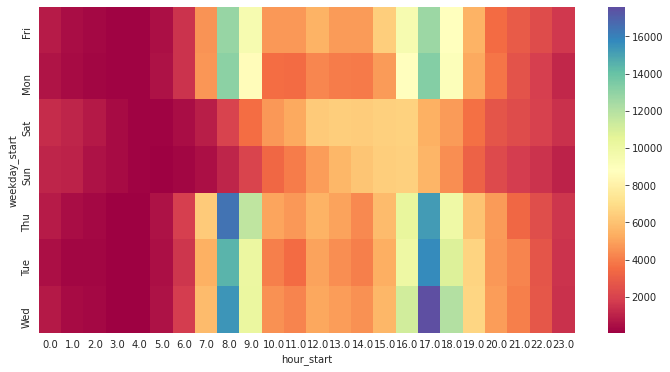

In [228]:
plt.figure(figsize=(12,6))
sns.heatmap(aktivitas_harian1, cmap='Spectral')